In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network

In [12]:
retweet1 = pd.read_csv("retweet1.csv")
retweet1

,user_id,retweeted_user_id
0,1341621542296276992,1241878234767163394
1,838225012662362112,942618447443144709
2,1286874913693814784,3788048898
3,1160621709642424321,49451747
4,374816756,4441008799
...,...,...
4078,4855446551,255850156
4079,984506857548107777,255850156
4080,948688247588380673,255850156
4081,984506857548107777,255850156


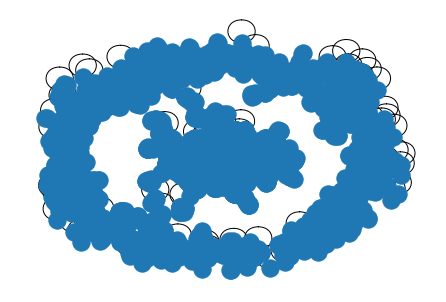

In [18]:
G=nx.from_pandas_edgelist(retweet1, 'user_id', 'retweeted_user_id',create_using=nx.Graph())
G.nodes()
nx.draw(G, with_labels = False)
nt = Network('500px', '500px')
nt.from_nx(G)
nt.show('nx.html')

In [34]:
id1 = pd.read_csv('id_bot1.csv')
id2 = pd.read_csv('id_bot2.csv')
id2.rename(columns = {'retweeted_user_id':'user_id'}, inplace = True)

In [36]:
ids = pd.concat([id1,id2])
bots = ids[ids['is_bot'] == True]
not_bots = ids[ids['is_bot'] == False]

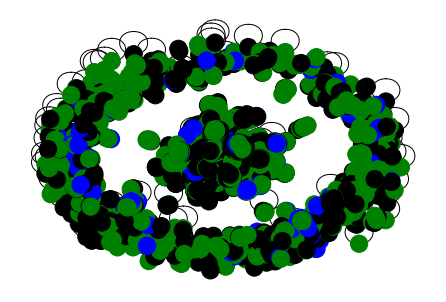

In [52]:
G=nx.from_pandas_edgelist(retweet1, 'user_id', 'retweeted_user_id',create_using=nx.Graph())
G.nodes()
color_map = []
for node in G:
    if node in list(bots['user_id']):
        color_map.append('blue')
    elif node in list(not_bots['user_id']) : 
        color_map.append('green')
    else:
        color_map.append("black")
nx.draw(G, node_color=color_map, with_labels = False)
nt = Network('500px', '500px')
nt.from_nx(G)
nt.show('nx_bots.html')

In [66]:
toxicity1 = pd.read_csv("toxicity.csv")
toxicity2 = pd.read_csv("toxicity_2.csv")
toxicity3 = pd.read_csv("toxicity3.csv")

In [68]:
toxicity = pd.concat([toxicity1, toxicity2, toxicity3])

,user_id,friend_id
0,327212339,95059162
1,327212339,44945327
2,327212339,3408847582
3,327212339,225411266
4,327212339,875456582468947968
...,...,...
99130,1007235402602819584,1291347136026759168
99131,1007235402602819584,18736950
99132,1007235402602819584,27442925
99133,1007235402602819584,19891705


In [71]:
G=nx.from_pandas_edgelist(toxicity, 'user_id', 'friend_id',create_using=nx.Graph())
G.nodes()
nx.draw(G, with_labels = False)
plt.show()

In [3]:
NLP = pd.read_csv('new_NLP.csv')

In [4]:
NLP

,X,sentiment_label,status_text
0,0,0,There is no good reason that credentialed pr...
1,1,0,Only hours ago Trump read these words from a...
2,2,0,Now Moscow Mitch McConnell brags hes handing...
3,3,0,Susan Collins is perhaps the most morally ba...
4,4,0,Lofgren laying out the trajectories of the Nix...
...,...,...,...
999995,999995,1,All this started They blame Trump for the...
999996,999996,1,EPIC Facebook and Twitter Smack Down Pelosis R...
999997,999997,1,Facts you wont hear from House Impeachment M...
999998,999998,1,HANNITY The Democrats Are a Broken Record on...


In [5]:
from nltk.corpus import stopwords
import nltk
import pandas as pd
import sklearn
from sklearn.cluster import KMeans
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
## For Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import os
import re   ## for regular expressions
from mpl_toolkits.mplot3d import Axes3D
#from nltk.stem.porter import PorterStemmer
from sklearn.decomposition import PCA
import warnings
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as hc
from sklearn import metrics

In [6]:
nltk.download('punkt');
def tokenize(column):
    """Tokenizes a Pandas dataframe column and returns a list of tokens.

    Args:
        column: Pandas dataframe column (i.e. df['text']).

    Returns:
        tokens (list): Tokenized list, i.e. [Donald, Trump, tweets]

    """

    tokens = nltk.word_tokenize(column)
    return [w for w in tokens if w.isalpha()]    
NLP['tokenized'] = NLP.apply(lambda x: tokenize(x['status_text']), axis=1)
NLP[['status_text', 'tokenized']].head()

[nltk_data] Downloading package punkt to /Users/hengxinwu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,status_text,tokenized
0,There is no good reason that credentialed pr...,"[There, is, no, good, reason, that, credential..."
1,Only hours ago Trump read these words from a...,"[Only, hours, ago, Trump, read, these, words, ..."
2,Now Moscow Mitch McConnell brags hes handing...,"[Now, Moscow, Mitch, McConnell, brags, hes, ha..."
3,Susan Collins is perhaps the most morally ba...,"[Susan, Collins, is, perhaps, the, most, moral..."
4,Lofgren laying out the trajectories of the Nix...,"[Lofgren, laying, out, the, trajectories, of, ..."


In [7]:
def apply_stemming(tokenized_column):
    """Return a list of tokens with Porter stemming applied.

    Args:
        column: Pandas dataframe column of tokenized data with stopwords removed.

    Returns:
        tokens (list): Tokenized list with words Porter stemmed.

    """

    stemmer = PorterStemmer() 
    return [stemmer.stem(word) for word in tokenized_column]

NLP['porter_stemmed'] = NLP.apply(lambda x: apply_stemming(x['tokenized']), axis=1)
NLP[['status_text', 'porter_stemmed']].head()

,status_text,porter_stemmed
0,There is no good reason that credentialed pr...,"[there, is, no, good, reason, that, credenti, ..."
1,Only hours ago Trump read these words from a...,"[onli, hour, ago, trump, read, these, word, fr..."
2,Now Moscow Mitch McConnell brags hes handing...,"[now, moscow, mitch, mcconnel, brag, he, hand,..."
3,Susan Collins is perhaps the most morally ba...,"[susan, collin, is, perhap, the, most, moral, ..."
4,Lofgren laying out the trajectories of the Nix...,"[lofgren, lay, out, the, trajectori, of, the, ..."


In [8]:
def rejoin_words(tokenized_column):
    """Rejoins a tokenized word list into a single string. 
    
    Args:
        tokenized_column (list): Tokenized column of words. 
        
    Returns:
        string: Single string of untokenized words. 
    """
    
    return ( " ".join(tokenized_column))
NLP['rejoined'] = NLP.apply(lambda x: rejoin_words(x['porter_stemmed']), axis=1)
NLP[['status_text', 'rejoined']].head()

,status_text,rejoined
0,There is no good reason that credentialed pr...,there is no good reason that credenti press sh...
1,Only hours ago Trump read these words from a...,onli hour ago trump read these word from a tel...
2,Now Moscow Mitch McConnell brags hes handing...,now moscow mitch mcconnel brag he hand control...
3,Susan Collins is perhaps the most morally ba...,susan collin is perhap the most moral bankrupt...
4,Lofgren laying out the trajectories of the Nix...,lofgren lay out the trajectori of the nixon bi...


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
counts = count_vect.fit_transform(NLP['rejoined'])

In [10]:
vectorizer = TfidfVectorizer()
counts = vectorizer.fit_transform(NLP['rejoined'])

In [14]:
from sklearn.model_selection import train_test_split
X = counts
y = NLP['sentiment_label']
X.train, X.test, y.train, y.test = train_test_split(X, y, test_size = 0.2)

In [15]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
#model = RandomForestClassifier()
model.fit(X.train, y.train)
y_pred_class = model.predict(X.test)
print('Accuracy: ', metrics.accuracy_score(y.test, y_pred_class))


Accuracy:  0.86131


/Users/hengxinwu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn import svm
model2 = svm.SVC()
model2.fit(X.train, y.train)
y_pred_class2 = model2.predict(X.test)
print('Accuracy: ', metrics.accuracy_score(y.test, y_pred_class2))